In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [8]:
data = pd.read_csv("column_2C_weka.csv") # datamızı çekiyoruz.
data.head() #datanın ilk 5 satırı

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


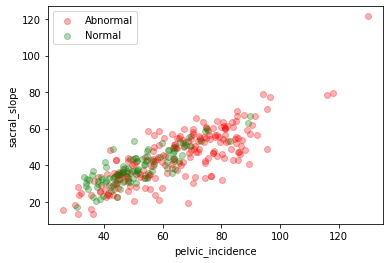

In [9]:
Abnormal = data[data["class"] == "Abnormal"] # datayı Normal ve Abnormal olarak ikiye ayırıyoruz.
Normal = data[data["class"] == "Normal"]

plt.scatter(Abnormal.pelvic_incidence,Abnormal.sacral_slope, color ="r" , label = "Abnormal", Alpha = 0.3) 
plt.scatter(Normal.pelvic_incidence, Normal.sacral_slope, color ="g" , label = "Normal", Alpha = 0.3)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")         # İki column'un Normal ve Abnormal olarak  karşılaştırılması
plt.legend()
plt.show()


In [10]:
data["class"] = [0 if each == "Abnormal" else 1  for each in data["class"]]  # classtaki isimleri integer hale getiryoruz.
y=data["class"].values                      
x_data = data.drop(["class"],axis = 1) 

In [11]:
# Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x   

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state = 42)
# datamızı train ve test olarak ayırıyoruz.

In [13]:
# KNN modeli
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # komşu sayısı = 3
knn.fit(x_train,y_train)
prediction=(knn.predict(x_test))
print("{} nn Score : {}".format(3,knn.score(x_test,y_test)))

3 nn Score : 0.7741935483870968


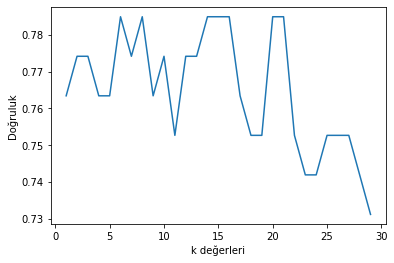

In [14]:
# k değeri bulma
score_list=[]
for i in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,30),score_list) # en uygun k değeri için 1'den 30'a kadar 
plt.xlabel("k değerleri")        # olan k değerlerini çizdiyoruz.
plt.ylabel("Doğruluk")
plt.show()